* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 44

---
---

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, TargetEncoder, RobustScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [62]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### **Target : LeaveOrNot**

In [64]:
x = df.drop(columns = 'LeaveOrNot')
y = df['LeaveOrNot']

### **Lakukan Feature Selection**

In [65]:
from dython.nominal import associations, cramers_v
import matplotlib.pyplot as plt
import seaborn as sns

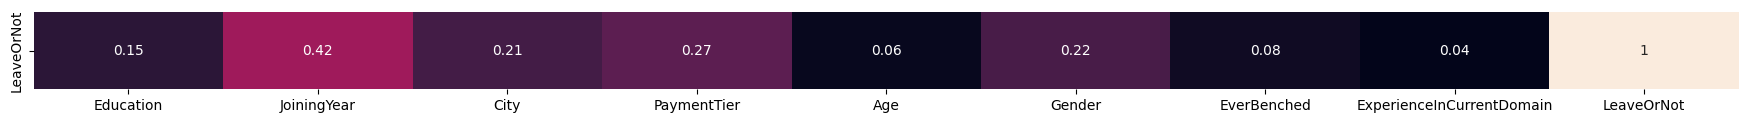

In [66]:
assoc_cr = []
col =  df.columns.tolist()
for i in col: 
    assoc = round(cramers_v(df['LeaveOrNot'], df[i]), 2) 
    assoc_cr.append(assoc)
    
df_cr = pd.DataFrame(data = [assoc_cr], columns = col, index=['LeaveOrNot'])

plt.figure(figsize=(22, 1))
sns.heatmap(df_cr, annot = True, cbar=False)
plt.show()

* Fitur-fitur yang memiliki korelasi rendah-sedang (0.1-0.5) akan digunakan sebagai fitur untuk modelling disertakan Domain Knowledgenya, diantaranya:

`Education` --> Latar pendidikan memiliki hubungan positif yang cukup kecil dengan retensi karyawan. Hal ini karena Karyawan dengan pendidikan tinggi mungkin lebih cenderung mencari peluang lebih baik di tempat lain

`JoiningYear` --> Tahun bergabung ke Company juga memiliki hubungan positif yang cukup signifikan dengan retensi karyawan. Semakin baru bergabung, semakin juga cenderung karyawan keluar dari perusahaan. Hal ini karena Karyawan yang telah bekerja lebih lama mungkin memiliki loyalitas lebih tinggi dan Karyawan yang baru bergabung lebih mungkin untuk keluar dari perusahaan (mencari passion dll)

`City` --> Hubungan antara kota dimana karyawan ditempatkan dengan retensi karyawan cukup tinggi. Hal ini dikarenakan lokasi tempat bekerja karyawan dapat berpengaruh terhadap keputusan karyawan untuk tetap bertahan atau tidak di perusaahan, misalnya seperti faktor aksesibilitas, biaya hidup, serta lingkungan kerja yang mendukung atau tidak.

`PaymentTier` --> Tingkat gaji karyawan memiliki pengaruh terhadap keputusan karyawan bertahan atau tidak di perusahaan. Tingkat gaji yang lebih tinggi dapat meningkatkan kepuasan kerja dan mengurangi kemungkinan karyawan keluar sedangkan Karyawan dengan gaji rendah mungkin mencari pekerjaan yang lebih menguntungkan.

`Gender` --> Gender memiliki hubungan yang cukup tinggi dengan retensi karyawan. Meskipun faktor gender tidak secara langsung menentukan apakah seseorang akan keluar atau bertahan, wanita cenderung mungkin mencari peluang di tempat lain yang dapat mempertimbangkan fleksibilitas kerja, keseimbangan antara kehidupan kerja dan keluarga atau memang memutuskan menjadi ibu rumah tangga saja setelah menikah

In [67]:
x_selection= df[['City', 'Gender', 'Education', 'PaymentTier', 'JoiningYear']]
y = df['LeaveOrNot']

### **Lakukan Feature Engineering**

In [68]:
ordinal_mapping = [{'col':'Education', 'mapping':{'Bachelors':1, 'Masters':2, 'PhD':3}}]

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Education',], mapping=ordinal_mapping))])


preprocessor = ColumnTransformer(
    transformers = [
        ('num', RobustScaler(), x_selection.select_dtypes(include = 'int64').columns),
        ('binary_encoder', BinaryEncoder(), ['Gender','City']),
        ('pipe_ordinal_scale', pipe_ordinal_scale, ['Education'])
    ])

x_processed = preprocessor.fit_transform(x_selection)

x_processed = pd.DataFrame(x_processed, 
                           columns = preprocessor.get_feature_names_out())

In [69]:
display(x_processed)

,num__PaymentTier,num__JoiningYear,binary_encoder__Gender_0,binary_encoder__Gender_1,binary_encoder__City_0,binary_encoder__City_1,pipe_ordinal_scale__Education
0,0.0,0.50,0.0,1.0,0.0,1.0,1.0
1,-2.0,-0.50,1.0,0.0,1.0,0.0,1.0
2,0.0,-0.25,1.0,0.0,1.0,1.0,1.0
3,0.0,0.25,0.0,1.0,0.0,1.0,2.0
4,0.0,0.50,0.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
4648,0.0,-0.50,1.0,0.0,0.0,1.0,1.0
4649,-1.0,-0.50,0.0,1.0,1.0,0.0,2.0
4650,0.0,0.75,0.0,1.0,1.0,1.0,2.0
4651,0.0,-0.75,0.0,1.0,0.0,1.0,1.0


### **Split data menjadi Train 75% dan Test 25%**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_processed, y, train_size = 0.75, random_state = 18)

### **Lakukan Modelling menggunakan Decision Tree**

In [71]:
# Decision Tree Model
model = DecisionTreeClassifier(random_state = None)
model.fit(X_train, y_train)

y_baseline_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_baseline_pred))
print("Classification Report:\n", classification_report(y_test, y_baseline_pred))

Accuracy: 0.8384879725085911
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89       747
           1       0.93      0.60      0.73       417

    accuracy                           0.84      1164
   macro avg       0.87      0.79      0.81      1164
weighted avg       0.85      0.84      0.83      1164



### **Lakukan Tuning untuk Hyper Parameter dari Decision Tree**

In [72]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Menginisialisasi GridSearchCV
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = None),
                           param_grid=param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# Melakukan pencarian grid pada data latih
grid_search.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Melatih model dengan hyperparameter terbaik
best_dt_model = grid_search.best_estimator_
y_best_pred = best_dt_model.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


### **Lakukan Evaluation Metrics Comparison**

In [73]:
baseline_metrics = {
    "Model": "Baseline",
    "Accuracy": accuracy_score(y_test, y_baseline_pred),
    "Precision": precision_score(y_test, y_baseline_pred, average='weighted'),
    "Recall": recall_score(y_test, y_baseline_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_baseline_pred, average='weighted')
}

best_model_metrics = {
    "Model": "With Tuning",
    "Accuracy": accuracy_score(y_test, y_best_pred),
    "Precision": precision_score(y_test, y_best_pred, average='weighted'),
    "Recall": recall_score(y_test, y_best_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_best_pred, average='weighted')
}

metrics_df = pd.DataFrame([baseline_metrics, best_model_metrics])
display(metrics_df)

print("Baseline Model Classification Report:\n", classification_report(y_test, y_baseline_pred))
print("With Tuning Classification Report:\n", classification_report(y_test, y_best_pred))


,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.838488,0.852901,0.838488,0.828344
1,With Tuning,0.834192,0.845562,0.834192,0.824474


Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89       747
           1       0.93      0.60      0.73       417

    accuracy                           0.84      1164
   macro avg       0.87      0.79      0.81      1164
weighted avg       0.85      0.84      0.83      1164

With Tuning Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       747
           1       0.91      0.60      0.72       417

    accuracy                           0.83      1164
   macro avg       0.86      0.78      0.80      1164
weighted avg       0.85      0.83      0.82      1164



#### 📌 **Tuning hyperparameter dengan GridSearchCV tidak memberikan peningkatan signifikan dibanding model baseline**, bahkan sedikit menurunkan performa di semua metrik. Hal ini menunjukkan bahwa model awal sudah cukup optimal atau metode tuning yang digunakan kurang efektif.

### **Tentukan Features mana yg paling penting**

In [74]:
feature_importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': best_dt_model.feature_importances_
}).sort_values(by = 'Importance',
               ascending = False).reset_index(drop = True)

display(feature_importance)

,Feature,Importance
0,num__JoiningYear,0.378991
1,num__PaymentTier,0.211395
2,binary_encoder__City_1,0.163220
3,pipe_ordinal_scale__Education,0.151033
4,binary_encoder__Gender_1,0.044543
5,binary_encoder__Gender_0,0.026071
6,binary_encoder__City_0,0.024748


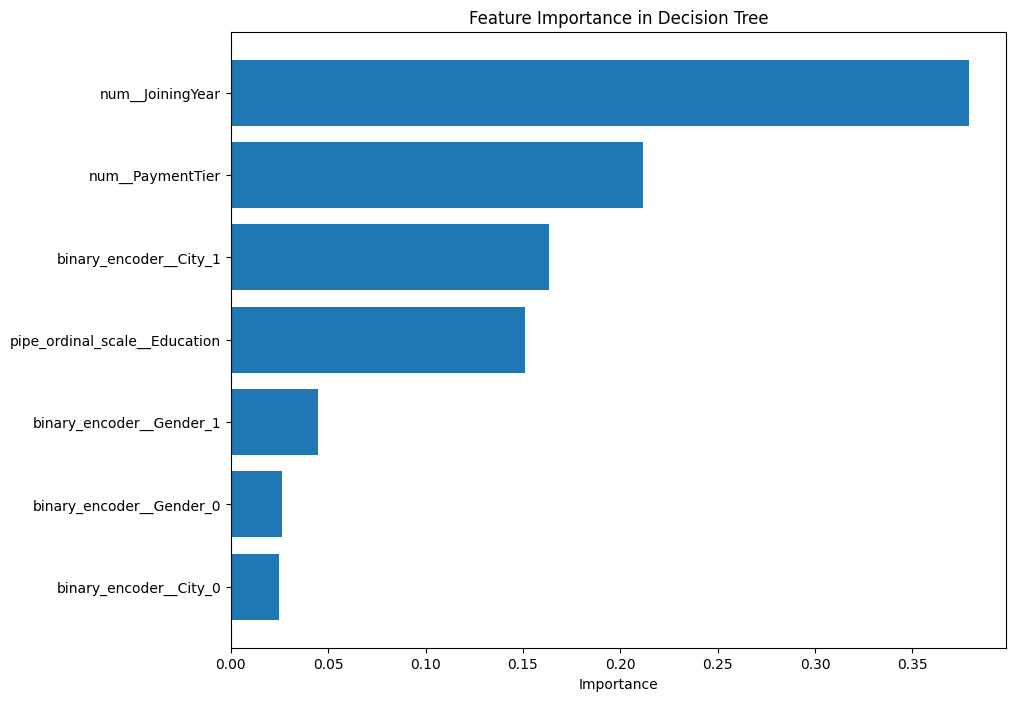

In [75]:
plt.figure(figsize = (10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

#### 📌 **Berdasarkan analisis feature importance pada model Decision Tree, fitur `JoiningYear` memiliki pengaruh terbesar terhadap prediksi, diikuti oleh `PaymentTier`, menunjukkan bahwa tahun bergabung dan tingkat pembayaran merupakan faktor utama dalam keputusan model**. Faktor lain seperti `City `dan `Education `juga berkontribusi signifikan, sementara `Gender` memiliki pengaruh yang lebih kecil